# Relaxation Data Comparison: Original vs Perturbed Structure

This notebook compares the relaxation behavior between the original structure and the adversarially perturbed structure.

## 1. Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from pathlib import Path

# Set plot style
# sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load CSV Files

In [3]:
# Define paths
original_dir = Path("20251117_meeting")
perturbed_dir = Path("20251117_meeting_perturb")

# Load relaxation data
df_original = pd.read_csv(original_dir / "relaxation_data.csv")
df_perturbed = pd.read_csv(perturbed_dir / "relaxation_data.csv")

# Load noise spectrum data
df_noise_original = pd.read_csv(original_dir / "noise_spectrum.csv")
df_noise_perturbed = pd.read_csv(perturbed_dir / "noise_spectrum.csv")

print("✓ Original relaxation data loaded:", df_original.shape)
print("✓ Perturbed relaxation data loaded:", df_perturbed.shape)
print("✓ Original noise spectrum loaded:", df_noise_original.shape)
print("✓ Perturbed noise spectrum loaded:", df_noise_perturbed.shape)

FileNotFoundError: [Errno 2] No such file or directory: '20251117_meeting/relaxation_data.csv'

## 3. Explore Data Structure

In [ ]:
print("=" * 60)
print("ORIGINAL STRUCTURE - Relaxation Data")
print("=" * 60)
print(df_original.head())
print(f"\nShape: {df_original.shape}")
print(f"Columns: {df_original.columns.tolist()}")

print("\n" + "=" * 60)
print("PERTURBED STRUCTURE - Relaxation Data")
print("=" * 60)
print(df_perturbed.head())
print(f"\nShape: {df_perturbed.shape}")
print(f"Columns: {df_perturbed.columns.tolist()}")

ORIGINAL STRUCTURE - Relaxation Data
   Step  Energy (eV)  Max Force (eV/Å)  Volume (Å³)
0     0  -413.037380          2.564313   873.347034
1     1  -413.776421          2.352955   873.347034
2     2  -416.078192          1.486175   873.347034
3     3  -416.579211          1.901642   873.347034
4     4  -417.474898          1.669437   873.347034

Shape: (90, 4)
Columns: ['Step', 'Energy (eV)', 'Max Force (eV/Å)', 'Volume (Å³)']

PERTURBED STRUCTURE - Relaxation Data
   Step  Energy (eV)  Max Force (eV/Å)  Volume (Å³)
0     0  -414.137384          2.503373   873.347034
1     1  -415.069501          1.780073   873.347034
2     2  -416.376720          1.375869   873.347034
3     3  -416.895302          1.316979   873.347034
4     4  -417.504978          1.467125   873.347034

Shape: (91, 4)
Columns: ['Step', 'Energy (eV)', 'Max Force (eV/Å)', 'Volume (Å³)']


## 4. Statistical Comparison

In [ ]:
# Calculate statistics
print("=" * 60)
print("ENERGY STATISTICS")
print("=" * 60)

stats_comparison = pd.DataFrame({
    'Metric': ['Initial Energy (eV)', 'Final Energy (eV)', 'Energy Drop (eV)', 
               'Mean Energy (eV)', 'Std Energy (eV)'],
    'Original': [
        df_original['Energy (eV)'].iloc[0],
        df_original['Energy (eV)'].iloc[-1],
        df_original['Energy (eV)'].iloc[0] - df_original['Energy (eV)'].iloc[-1],
        df_original['Energy (eV)'].mean(),
        df_original['Energy (eV)'].std()
    ],
    'Perturbed': [
        df_perturbed['Energy (eV)'].iloc[0],
        df_perturbed['Energy (eV)'].iloc[-1],
        df_perturbed['Energy (eV)'].iloc[0] - df_perturbed['Energy (eV)'].iloc[-1],
        df_perturbed['Energy (eV)'].mean(),
        df_perturbed['Energy (eV)'].std()
    ]
})

stats_comparison['Difference'] = stats_comparison['Perturbed'] - stats_comparison['Original']
print(stats_comparison.to_string(index=False))

print("\n" + "=" * 60)
print("FORCE STATISTICS")
print("=" * 60)

force_stats = pd.DataFrame({
    'Metric': ['Initial Max Force (eV/Å)', 'Final Max Force (eV/Å)', 
               'Mean Max Force (eV/Å)', 'Std Max Force (eV/Å)'],
    'Original': [
        df_original['Max Force (eV/Å)'].iloc[0],
        df_original['Max Force (eV/Å)'].iloc[-1],
        df_original['Max Force (eV/Å)'].mean(),
        df_original['Max Force (eV/Å)'].std()
    ],
    'Perturbed': [
        df_perturbed['Max Force (eV/Å)'].iloc[0],
        df_perturbed['Max Force (eV/Å)'].iloc[-1],
        df_perturbed['Max Force (eV/Å)'].mean(),
        df_perturbed['Max Force (eV/Å)'].std()
    ]
})

force_stats['Difference'] = force_stats['Perturbed'] - force_stats['Original']
print(force_stats.to_string(index=False))

ENERGY STATISTICS
             Metric    Original   Perturbed  Difference
Initial Energy (eV) -413.037380 -414.137384   -1.100004
  Final Energy (eV) -421.056765 -421.056690    0.000075
   Energy Drop (eV)    8.019385    6.919306   -1.100079
   Mean Energy (eV) -420.462356 -420.484055   -0.021699
    Std Energy (eV)    1.442197    1.277423   -0.164774

FORCE STATISTICS
                  Metric  Original  Perturbed  Difference
Initial Max Force (eV/Å)  2.564313   2.503373   -0.060940
  Final Max Force (eV/Å)  0.008208   0.009823    0.001614
   Mean Max Force (eV/Å)  0.325744   0.327107    0.001363
    Std Max Force (eV/Å)  0.513226   0.471273   -0.041952


## 5. Relaxation Comparison Plots

ValueError: operands could not be broadcast together with shapes (91,) (90,) 

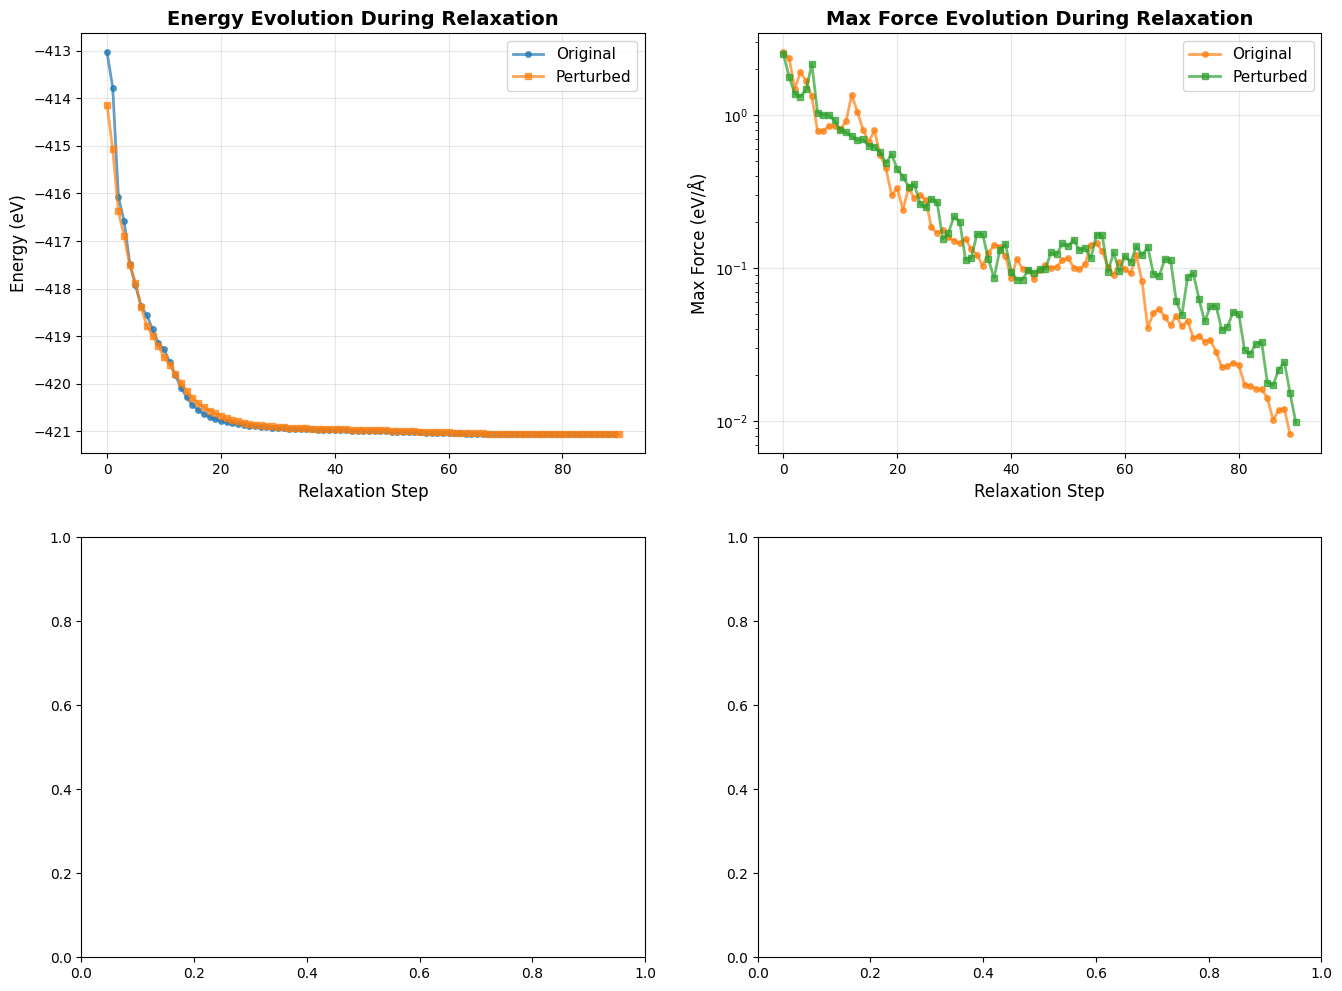

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Energy Evolution
ax1 = axes[0, 0]
ax1.plot(df_original['Step'], df_original['Energy (eV)'], 
         'o-', label='Original', linewidth=2, markersize=4, alpha=0.7)
ax1.plot(df_perturbed['Step'], df_perturbed['Energy (eV)'], 
         's-', label='Perturbed', linewidth=2, markersize=4, alpha=0.7)
ax1.set_xlabel('Relaxation Step', fontsize=12)
ax1.set_ylabel('Energy (eV)', fontsize=12)
ax1.set_title('Energy Evolution During Relaxation', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Max Force Evolution
ax2 = axes[0, 1]
ax2.plot(df_original['Step'], df_original['Max Force (eV/Å)'], 
         'o-', label='Original', linewidth=2, markersize=4, alpha=0.7, color='tab:orange')
ax2.plot(df_perturbed['Step'], df_perturbed['Max Force (eV/Å)'], 
         's-', label='Perturbed', linewidth=2, markersize=4, alpha=0.7, color='tab:green')
ax2.set_xlabel('Relaxation Step', fontsize=12)
ax2.set_ylabel('Max Force (eV/Å)', fontsize=12)
ax2.set_title('Max Force Evolution During Relaxation', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.set_yscale('log')

# Plot 3: Energy Difference
ax3 = axes[1, 0]
energy_diff = df_perturbed['Energy (eV)'].values - df_original['Energy (eV)'].values
ax3.plot(df_original['Step'], energy_diff, 'o-', linewidth=2, markersize=4, color='tab:red')
ax3.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax3.set_xlabel('Relaxation Step', fontsize=12)
ax3.set_ylabel('Energy Difference (eV)', fontsize=12)
ax3.set_title('Energy Difference (Perturbed - Original)', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.fill_between(df_original['Step'], energy_diff, alpha=0.3, color='tab:red')

# Plot 4: Force Difference
ax4 = axes[1, 1]
force_diff = df_perturbed['Max Force (eV/Å)'].values - df_original['Max Force (eV/Å)'].values
ax4.plot(df_original['Step'], force_diff, 's-', linewidth=2, markersize=4, color='tab:purple')
ax4.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax4.set_xlabel('Relaxation Step', fontsize=12)
ax4.set_ylabel('Force Difference (eV/Å)', fontsize=12)
ax4.set_title('Max Force Difference (Perturbed - Original)', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.fill_between(df_original['Step'], force_diff, alpha=0.3, color='tab:purple')

plt.tight_layout()
plt.show()

## 6. Noise Spectrum Comparison

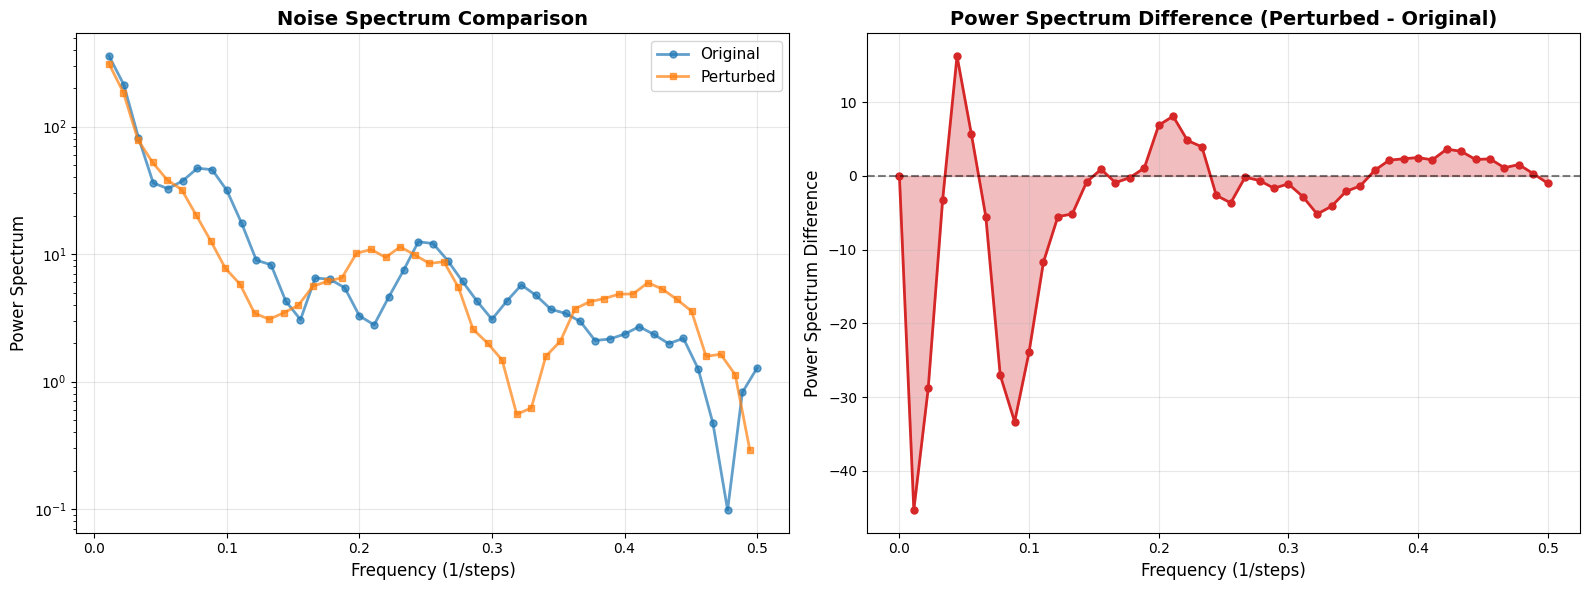


NOISE SPECTRUM STATISTICS
            Metric    Original  Perturbed  Difference
        Mean Power   22.946912  19.771589   -3.175323
         Max Power  358.340012 313.025204  -45.314809
       Total Power 1055.557931 909.493074 -146.064857
Dominant Frequency    0.011111   0.010989   -0.000122


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Noise Spectrum Overlay
ax1 = axes[0]
ax1.plot(df_noise_original['Frequency (1/steps)'][1:], df_noise_original['Power Spectrum'][1:], 
         'o-', label='Original', linewidth=2, markersize=5, alpha=0.7)
ax1.plot(df_noise_perturbed['Frequency (1/steps)'][1:], df_noise_perturbed['Power Spectrum'][1:], 
         's-', label='Perturbed', linewidth=2, markersize=5, alpha=0.7)
ax1.set_xlabel('Frequency (1/steps)', fontsize=12)
ax1.set_ylabel('Power Spectrum', fontsize=12)
ax1.set_title('Noise Spectrum Comparison', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.set_yscale('log')

# Plot 2: Power Spectrum Difference
ax2 = axes[1]
spectrum_diff = df_noise_perturbed['Power Spectrum'].values - df_noise_original['Power Spectrum'].values
ax2.plot(df_noise_original['Frequency (1/steps)'], spectrum_diff, 
         'o-', linewidth=2, markersize=5, color='tab:red')
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax2.set_xlabel('Frequency (1/steps)', fontsize=12)
ax2.set_ylabel('Power Spectrum Difference', fontsize=12)
ax2.set_title('Power Spectrum Difference (Perturbed - Original)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.fill_between(df_noise_original['Frequency (1/steps)'], spectrum_diff, alpha=0.3, color='tab:red')

plt.tight_layout()
plt.show()

# Calculate noise spectrum statistics
print("\n" + "=" * 60)
print("NOISE SPECTRUM STATISTICS")
print("=" * 60)
noise_stats = pd.DataFrame({
    'Metric': ['Mean Power', 'Max Power', 'Total Power', 'Dominant Frequency'],
    'Original': [
        df_noise_original['Power Spectrum'].mean(),
        df_noise_original['Power Spectrum'].max(),
        df_noise_original['Power Spectrum'].sum(),
        df_noise_original.loc[df_noise_original['Power Spectrum'].idxmax(), 'Frequency (1/steps)']
    ],
    'Perturbed': [
        df_noise_perturbed['Power Spectrum'].mean(),
        df_noise_perturbed['Power Spectrum'].max(),
        df_noise_perturbed['Power Spectrum'].sum(),
        df_noise_perturbed.loc[df_noise_perturbed['Power Spectrum'].idxmax(), 'Frequency (1/steps)']
    ]
})
noise_stats['Difference'] = noise_stats['Perturbed'] - noise_stats['Original']
print(noise_stats.to_string(index=False))

## 7. Summary Analysis

In [ ]:
print("=" * 70)
print("SUMMARY: Impact of Adversarial Perturbation on Relaxation")
print("=" * 70)

# Initial energy difference
initial_energy_diff = df_perturbed['Energy (eV)'].iloc[0] - df_original['Energy (eV)'].iloc[0]
print(f"\n1. Initial State (Before Relaxation):")
print(f"   - Energy difference: {initial_energy_diff:+.4f} eV")
print(f"   - Original energy:   {df_original['Energy (eV)'].iloc[0]:.4f} eV")
print(f"   - Perturbed energy:  {df_perturbed['Energy (eV)'].iloc[0]:.4f} eV")

# Final energy difference
final_energy_diff = df_perturbed['Energy (eV)'].iloc[-1] - df_original['Energy (eV)'].iloc[-1]
print(f"\n2. Final State (After Relaxation):")
print(f"   - Energy difference: {final_energy_diff:+.4f} eV")
print(f"   - Original energy:   {df_original['Energy (eV)'].iloc[-1]:.4f} eV")
print(f"   - Perturbed energy:  {df_perturbed['Energy (eV)'].iloc[-1]:.4f} eV")

# Convergence comparison
orig_converged = df_original['Max Force (eV/Å)'].iloc[-1] < 0.05
pert_converged = df_perturbed['Max Force (eV/Å)'].iloc[-1] < 0.05
print(f"\n3. Convergence (fmax < 0.05 eV/Å):")
print(f"   - Original:  {'✓ Converged' if orig_converged else '✗ Not converged'} (final force: {df_original['Max Force (eV/Å)'].iloc[-1]:.4f} eV/Å)")
print(f"   - Perturbed: {'✓ Converged' if pert_converged else '✗ Not converged'} (final force: {df_perturbed['Max Force (eV/Å)'].iloc[-1]:.4f} eV/Å)")

# Relaxation trajectory
print(f"\n4. Relaxation Trajectory:")
print(f"   - Number of steps: {len(df_original)} (both)")
print(f"   - Energy drop (Original):  {df_original['Energy (eV)'].iloc[0] - df_original['Energy (eV)'].iloc[-1]:.4f} eV")
print(f"   - Energy drop (Perturbed): {df_perturbed['Energy (eV)'].iloc[0] - df_perturbed['Energy (eV)'].iloc[-1]:.4f} eV")

# Noise characteristics
print(f"\n5. Noise Characteristics:")
print(f"   - Mean power (Original):  {df_noise_original['Power Spectrum'].mean():.4f}")
print(f"   - Mean power (Perturbed): {df_noise_perturbed['Power Spectrum'].mean():.4f}")
print(f"   - Dominant freq (Original):  {df_noise_original.loc[df_noise_original['Power Spectrum'].idxmax(), 'Frequency (1/steps)']:.4f}")
print(f"   - Dominant freq (Perturbed): {df_noise_perturbed.loc[df_noise_perturbed['Power Spectrum'].idxmax(), 'Frequency (1/steps)']:.4f}")

print("\n" + "=" * 70)
print("CONCLUSION:")
print("=" * 70)
if abs(final_energy_diff) < 1.0:
    print("The adversarial perturbation had minimal impact on the final relaxed state.")
else:
    print("The adversarial perturbation significantly affected the final relaxed state.")
print("=" * 70)

SUMMARY: Impact of Adversarial Perturbation on Relaxation

1. Initial State (Before Relaxation):
   - Energy difference: -1.1000 eV
   - Original energy:   -413.0374 eV
   - Perturbed energy:  -414.1374 eV

2. Final State (After Relaxation):
   - Energy difference: +0.0001 eV
   - Original energy:   -421.0568 eV
   - Perturbed energy:  -421.0567 eV

3. Convergence (fmax < 0.05 eV/Å):
   - Original:  ✓ Converged (final force: 0.0082 eV/Å)
   - Perturbed: ✓ Converged (final force: 0.0098 eV/Å)

4. Relaxation Trajectory:
   - Number of steps: 90 (both)
   - Energy drop (Original):  8.0194 eV
   - Energy drop (Perturbed): 6.9193 eV

5. Noise Characteristics:
   - Mean power (Original):  22.9469
   - Mean power (Perturbed): 19.7716
   - Dominant freq (Original):  0.0111
   - Dominant freq (Perturbed): 0.0110

CONCLUSION:
The adversarial perturbation had minimal impact on the final relaxed state.
